<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/decisiontree_pyinb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = {'age':['Junior','Youth','Middle','Senior','Youth','Middle','Senior','Middle','Junior'],
      'income':['low','high','low','low','high','high','high','low','low'],
      'credit':['bad','fair','excellent','excellent','fair','excellent','bad','fair','bad'],
      'loan_buy_car':['no','yes','yes','yes','no','yes','no','no','no']
      }

A **Decision Tree** is a flowchart-like structure where each internal node represents a "test" on an attribute (e.g., whether a person's age is 'Senior'), each branch represents the outcome of the test, and each leaf node represents a class label (the decision taken after computing all attributes). The paths from the root to a leaf represent classification rules.

Here's a breakdown of how it works and its components:

1.  **Root Node:** The topmost node in the tree. It represents the initial feature that the tree uses to split the data.
2.  **Internal Nodes:** Each internal node represents a feature test that leads to further splits in the data.
3.  **Branches:** The outcomes of the feature tests are represented by branches, connecting nodes.
4.  **Leaf Nodes:** The terminal nodes of the tree, which represent the final decision or class label.

**How it learns:**
The algorithm works by recursively partitioning the dataset into smaller subsets. At each step, it chooses the feature that best splits the data to make the subsets as 'pure' as possible in terms of the target variable. This process continues until a stopping criterion is met (e.g., all samples in a subset belong to the same class, or the maximum depth of the tree is reached).

Let's visualize the decision tree that was just fitted to your data to see its structure and decision-making process.

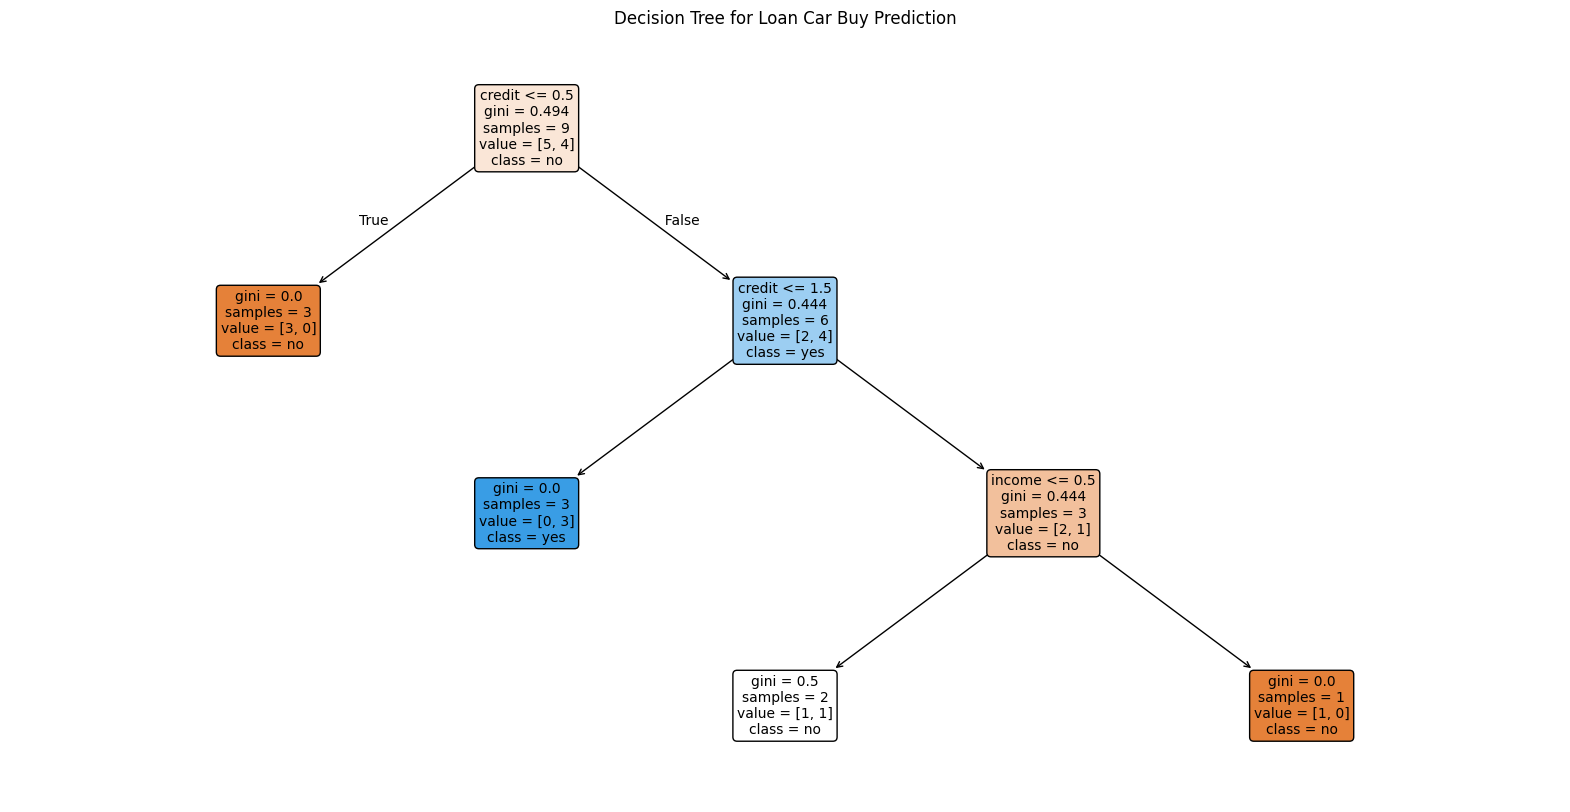

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Re-define df (as it was not executed prior to X being defined)
df_data = {'age':['Junior','Youth','Middle','Senior','Youth','Middle','Senior','Middle','Junior'],
      'income':['low','high','low','low','high','high','high','low','low'],
      'credit':['bad','fair','excellent','excellent','fair','excellent','bad','fair','bad'],
      'loan_buy_car':['no','yes','yes','yes','no','yes','no','no','no']
      }
df = pd.DataFrame(df_data)

# Encode the DataFrame (as df_encoded was not executed prior)
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Define X and y (as they were not executed prior)
X = df_encoded.drop('loan_buy_car',axis=1)
y = df_encoded['loan_buy_car']

# Instantiate and fit the model (as it was not executed prior)
model = DecisionTreeClassifier()
model.fit(X,y)

# Get feature names from X (encoded DataFrame columns)
feature_names = X.columns.tolist()

# Get class names from y (loan_buy_car categories)
class_names_mapping = dict(enumerate(df['loan_buy_car'].astype('category').cat.categories))
class_names = [class_names_mapping[i] for i in sorted(class_names_mapping.keys())]

plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Loan Car Buy Prediction")
plt.show()

## Understanding Entropy

**Entropy** is a measure of the randomness or impurity in a set of examples. In the context of decision trees, it quantifies the uncertainty of a target variable within a node. The higher the entropy, the more mixed or impure the data is; the lower the entropy, the more pure (homogeneous) the data is.

**Key Characteristics:**
*   **Range:** For binary classification, Entropy ranges from 0 to 1. A node with an Entropy of 0 is perfectly pure (all samples belong to the same class), while an Entropy of 1 (for binary classification with equal class distribution) indicates perfect impurity.
*   **Goal:** Decision tree algorithms aim to reduce the entropy at each split, meaning they try to create child nodes that are as pure as possible.

**How it's Calculated:**
For a given node with `C` classes, the Entropy is calculated as:

$Entropy = - \sum_{i=1}^{C} p_i \log_2(p_i)$

Where:
*   $p_i$ is the proportion of samples belonging to class $i$ in the node.
*   If $p_i = 0$, then $p_i \log_2(p_i)$ is considered 0.

**Information Gain:**
Just like with Gini Index, when splitting a node, we use **Information Gain** to evaluate the quality of a split. Information Gain is the reduction in entropy achieved by that split.

$Information~Gain = Entropy_{parent} - \sum_{j=1}^{k} (\frac{N_j}{N}) Entropy_{child~j}$

Where:
*   $Entropy_{parent}$ is the Entropy of the parent node.
*   $k$ is the number of child nodes.
*   $N_j$ is the number of samples in child node $j$.
*   $N$ is the total number of samples in the parent node.
*   $Entropy_{child~j}$ is the Entropy of child node $j$.

A split with higher Information Gain is preferred because it leads to a greater reduction in uncertainty.

Let's calculate Entropy with some examples.

In [ ]:
import numpy as np

def calculate_entropy(counts):
    """
    Calculates the Entropy for a given set of class counts.
    counts: A list or numpy array of integers, where each element is the count
            of samples belonging to a particular class.
    """
    total_samples = np.sum(counts)
    if total_samples == 0:
        return 0.0 # Handle empty node case

    entropy = 0.0
    for count in counts:
        probability = count / total_samples
        if probability > 0:
            entropy -= probability * np.log2(probability)
    return entropy

# Example 1: A perfectly pure node (all samples in one class)
# 9 'yes' and 0 'no'
class_counts_pure = [9, 0]
entropy_pure = calculate_entropy(class_counts_pure)
print(f"Entropy for pure node (9 yes, 0 no): {entropy_pure:.4f}")

# Example 2: An impure node (mixed classes)
# 5 'yes' and 4 'no'
class_counts_impure = [5, 4]
entropy_impure = calculate_entropy(class_counts_impure)
print(f"Entropy for impure node (5 yes, 4 no): {entropy_impure:.4f}")

# Example 3: A perfectly impure node (for binary classification with equal distribution)
# 5 'yes' and 5 'no' (hypothetical for 10 samples)
class_counts_perfectly_impure = [5, 5]
entropy_perfectly_impure = calculate_entropy(class_counts_perfectly_impure)
print(f"Entropy for perfectly impure node (5 yes, 5 no): {entropy_perfectly_impure:.4f}")


# Let's reconsider the split scenario for 'loan_buy_car' using Entropy
# Original data: 4 'yes', 5 'no'

original_counts = [4, 5]
parent_entropy = calculate_entropy(original_counts)
print(f"\nParent Node Entropy (4 'yes', 5 'no'): {parent_entropy:.4f}")

# Hypothetical split 1: By 'age' == 'Junior'
# 'Junior' leads to: 1 'yes', 2 'no'
# Remaining (not 'Junior') leads to: 3 'yes', 3 'no'

child1_counts = [1, 2]
child2_counts = [3, 3]

entropy_child1 = calculate_entropy(child1_counts)
entropy_child2 = calculate_entropy(child2_counts)

weighted_entropy_split1 = (np.sum(child1_counts) / np.sum(original_counts)) * entropy_child1 + \
                          (np.sum(child2_counts) / np.sum(original_counts)) * entropy_child2

information_gain_split1 = parent_entropy - weighted_entropy_split1

print(f"\nSplit by 'age' == 'Junior':")
print(f"  Child 1 (Junior) Entropy: {entropy_child1:.4f} (1 yes, 2 no)")
print(f"  Child 2 (Not Junior) Entropy: {entropy_child2:.4f} (3 yes, 3 no)")
print(f"  Weighted Entropy after split: {weighted_entropy_split1:.4f}")
print(f"  Information Gain: {information_gain_split1:.4f}")

# Hypothetical split 2: By 'credit' == 'excellent'
# 'excellent' leads to: 2 'yes', 0 'no'
# Remaining (not 'excellent') leads to: 2 'yes', 5 'no'

child3_counts = [2, 0]
child4_counts = [2, 5]

entropy_child3 = calculate_entropy(child3_counts)
entropy_child4 = calculate_entropy(child4_counts)

weighted_entropy_split2 = (np.sum(child3_counts) / np.sum(original_counts)) * entropy_child3 + \
                          (np.sum(child4_counts) / np.sum(original_counts)) * entropy_child4

information_gain_split2 = parent_entropy - weighted_entropy_split2

print(f"\nSplit by 'credit' == 'excellent':")
print(f"  Child 3 (excellent) Entropy: {entropy_child3:.4f} (2 yes, 0 no)")
print(f"  Child 4 (not excellent) Entropy: {entropy_child4:.4f} (2 yes, 5 no)")
print(f"  Weighted Entropy after split: {weighted_entropy_split2:.4f}")
print(f"  Information Gain: {information_gain_split2:.4f}")

# Comparing the two splits, the split with a higher Information Gain is preferred.

Entropy for pure node (9 yes, 0 no): 0.0000
Entropy for impure node (5 yes, 4 no): 0.9911
Entropy for perfectly impure node (5 yes, 5 no): 1.0000

Parent Node Entropy (4 'yes', 5 'no'): 0.9911

Split by 'age' == 'Junior':
  Child 1 (Junior) Entropy: 0.9183 (1 yes, 2 no)
  Child 2 (Not Junior) Entropy: 1.0000 (3 yes, 3 no)
  Weighted Entropy after split: 0.9728
  Information Gain: 0.0183

Split by 'credit' == 'excellent':
  Child 3 (excellent) Entropy: 0.0000 (2 yes, 0 no)
  Child 4 (not excellent) Entropy: 0.8631 (2 yes, 5 no)
  Weighted Entropy after split: 0.6713
  Information Gain: 0.3198


The **Gini Index** (or Gini impurity) is a measure of impurity or disorder used in decision tree algorithms, particularly CART (Classification and Regression Trees), to decide how to split nodes. It quantifies how often a randomly chosen element from the set would be incorrectly labeled if it were randomly labeled according to the distribution of labels in the subset.

**Key Characteristics:**
*   **Range:** The Gini index ranges from 0 to 0.5. A Gini index of 0 means the node is perfectly pure (all samples belong to the same class), and a Gini index of 0.5 (for a binary classification problem with equal class distribution) means the node is perfectly impure (samples are equally distributed among different classes).
*   **Goal:** Decision tree algorithms aim to minimize the Gini index at each split, meaning they try to create child nodes that are as pure as possible.

**How it's Calculated:**
For a given node with `C` classes, the Gini index is calculated as:

$Gini = 1 - \sum_{i=1}^{C} (p_i)^2$

Where:
*   $p_i$ is the proportion of samples belonging to class $i$ in the node.
*   $\sum_{i=1}^{C} (p_i)^2$ is the sum of the squared probabilities of each class.

**Gini Gain:**
When splitting a node, we calculate the Gini index for the parent node and the weighted Gini index for the child nodes. The **Gini Gain** (or impurity reduction) is used to evaluate the quality of a split. A higher Gini Gain means a better split.

$Gini~Gain = Gini_{parent} - \sum_{j=1}^{k} (\frac{N_j}{N}) Gini_{child~j}$

Where:
*   $Gini_{parent}$ is the Gini index of the parent node.
*   $k$ is the number of child nodes (typically 2 for binary splits).
*   $N_j$ is the number of samples in child node $j$.
*   $N$ is the total number of samples in the parent node.
*   $Gini_{child~j}$ is the Gini index of child node $j$.

Let's look at an example to calculate the Gini index.

In [ ]:
import numpy as np

def calculate_gini_index(counts):
    """
    Calculates the Gini index for a given set of class counts.
    counts: A list or numpy array of integers, where each element is the count
            of samples belonging to a particular class.
    """
    total_samples = np.sum(counts)
    if total_samples == 0:
        return 0.0 # Handle empty node case

    gini = 1.0
    for count in counts:
        probability = count / total_samples
        gini -= probability**2
    return gini

# Example 1: A perfectly pure node (all samples in one class)
# 9 'yes' and 0 'no' (e.g., loan_buy_car: ['yes', 'yes', ..., 'yes'])
class_counts_pure = [9, 0]
gini_pure = calculate_gini_index(class_counts_pure)
print(f"Gini Index for pure node (9 yes, 0 no): {gini_pure:.4f}")

# Example 2: An impure node (mixed classes)
# 5 'yes' and 4 'no' (e.g., loan_buy_car: ['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no'])
class_counts_impure = [5, 4]
gini_impure = calculate_gini_index(class_counts_impure)
print(f"Gini Index for impure node (5 yes, 4 no): {gini_impure:.4f}")

# Example 3: A perfectly impure node (for binary classification with equal distribution)
# 5 'yes' and 5 'no' (hypothetical for 10 samples)
class_counts_perfectly_impure = [5, 5]
gini_perfectly_impure = calculate_gini_index(class_counts_perfectly_impure)
print(f"Gini Index for perfectly impure node (5 yes, 5 no): {gini_perfectly_impure:.4f}")


# Let's consider a split scenario for 'loan_buy_car'
# Original data (from df['loan_buy_car']):
# ['no','yes','yes','yes','no','yes','no','no','no']
# Counts: 'yes': 4, 'no': 5

original_counts = [4, 5] # [count_yes, count_no]
parent_gini = calculate_gini_index(original_counts)
print(f"\nParent Node Gini Index (4 'yes', 5 'no'): {parent_gini:.4f}")

# Hypothetical split 1: By 'age' == 'Junior'
# Assume 'Junior' leads to: 1 'yes', 2 'no'
# Remaining (not 'Junior') leads to: 3 'yes', 3 'no'

child1_counts = [1, 2] # Junior: 1 'yes', 2 'no'
child2_counts = [3, 3] # Not Junior: 3 'yes', 3 'no'

gini_child1 = calculate_gini_index(child1_counts)
gini_child2 = calculate_gini_index(child2_counts)

weighted_gini_split1 = (np.sum(child1_counts) / np.sum(original_counts)) * gini_child1 + \
                       (np.sum(child2_counts) / np.sum(original_counts)) * gini_child2

gini_gain_split1 = parent_gini - weighted_gini_split1

print(f"\nSplit by 'age' == 'Junior':")
print(f"  Child 1 (Junior) Gini: {gini_child1:.4f} (1 yes, 2 no)")
print(f"  Child 2 (Not Junior) Gini: {gini_child2:.4f} (3 yes, 3 no)")
print(f"  Weighted Gini after split: {weighted_gini_split1:.4f}")
print(f"  Gini Gain: {gini_gain_split1:.4f}")

# Hypothetical split 2: By 'credit' == 'excellent'
# Assume 'excellent' leads to: 2 'yes', 0 'no'
# Remaining (not 'excellent') leads to: 2 'yes', 5 'no'

child3_counts = [2, 0] # excellent: 2 'yes', 0 'no'
child4_counts = [2, 5] # not excellent: 2 'yes', 5 'no'

gini_child3 = calculate_gini_index(child3_counts)
gini_child4 = calculate_gini_index(child4_counts)

weighted_gini_split2 = (np.sum(child3_counts) / np.sum(original_counts)) * gini_child3 + \
                       (np.sum(child4_counts) / np.sum(original_counts)) * gini_child4

gini_gain_split2 = parent_gini - weighted_gini_split2

print(f"\nSplit by 'credit' == 'excellent':")
print(f"  Child 3 (excellent) Gini: {gini_child3:.4f} (2 yes, 0 no)")
print(f"  Child 4 (not excellent) Gini: {gini_child4:.4f} (2 yes, 5 no)")
print(f"  Weighted Gini after split: {weighted_gini_split2:.4f}")
print(f"  Gini Gain: {gini_gain_split2:.4f}")


# Comparing the two splits, the split with a higher Gini Gain is preferred.

Gini Index for pure node (9 yes, 0 no): 0.0000
Gini Index for impure node (5 yes, 4 no): 0.4938
Gini Index for perfectly impure node (5 yes, 5 no): 0.5000

Parent Node Gini Index (4 'yes', 5 'no'): 0.4938

Split by 'age' == 'Junior':
  Child 1 (Junior) Gini: 0.4444 (1 yes, 2 no)
  Child 2 (Not Junior) Gini: 0.5000 (3 yes, 3 no)
  Weighted Gini after split: 0.4815
  Gini Gain: 0.0123

Split by 'credit' == 'excellent':
  Child 3 (excellent) Gini: 0.0000 (2 yes, 0 no)
  Child 4 (not excellent) Gini: 0.4082 (2 yes, 5 no)
  Weighted Gini after split: 0.3175
  Gini Gain: 0.1764


### Implementing Support Vector Machines (SVM) in Python

Let's implement a basic SVM classifier using `scikit-learn` on the same encoded dataset (`X`, `y`) that we used for the Decision Tree.

In [ ]:
import pandas as pd
from sklearn.svm import SVC

# Re-define df (as it might not have been executed prior)
df_data = {'age':['Junior','Youth','Middle','Senior','Youth','Middle','Senior','Middle','Junior'],
      'income':['low','high','low','low','high','high','high','low','low'],
      'credit':['bad','fair','excellent','excellent','fair','excellent','bad','fair','bad'],
      'loan_buy_car':['no','yes','yes','yes','no','yes','no','no','no']
      }
df = pd.DataFrame(df_data)

# Encode the DataFrame (as df_encoded might not have been executed prior)
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

# Define X and y (as they might not have been executed prior)
X = df_encoded.drop('loan_buy_car',axis=1)
y = df_encoded['loan_buy_car']

# Instantiate the Support Vector Classifier model
svm_model = SVC(random_state=42) # Using a random_state for reproducibility

# Fit the model to the encoded training data
svm_model.fit(X, y)

print("SVM Model trained successfully!")

# Let's make a prediction with the same example feature as before:
# feature = [age, income, credit]
# In encoded form, [2, 2, 1] corresponds to:
# age: Senior (2)
# income: low (2) - CHECK THIS, 'low' was 1 in previous encoding
# credit: excellent (1)

# Re-checking the encoding for income and credit for consistency:
# df['income'].astype('category').cat.categories -> Index(['high', 'low'], dtype='object')
# 'high' is 0, 'low' is 1
# df['credit'].astype('category').cat.categories -> Index(['bad', 'excellent', 'fair'], dtype='object')
# 'bad' is 0, 'excellent' is 1, 'fair' is 2

# So, a feature vector of [2, 1, 1] would correspond to:
# age: Senior (encoded as 2)
# income: low (encoded as 1)
# credit: excellent (encoded as 1)

# Let's use [2, 1, 1] for Senior, low income, excellent credit
example_feature = [2, 1, 1]
prediction = svm_model.predict([example_feature])

# Map the numerical prediction back to the original class names
# The original 'loan_buy_car' categories were ['no', 'yes'] (0 for 'no', 1 for 'yes')
class_names_mapping = dict(enumerate(df['loan_buy_car'].astype('category').cat.categories))
predicted_class_name = class_names_mapping[prediction[0]]

print(f"\nPrediction for feature {example_feature} (Senior, low income, excellent credit): {predicted_class_name}")

SVM Model trained successfully!

Prediction for feature [2, 1, 1] (Senior, low income, excellent credit): yes


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
df_encoded = df.apply(lambda col: col.astype('category').cat.codes)

<h1> Important</h1>
<b>ENcoding</b>
Certainly! The code lambda col: col.astype('category').cat.codes is a lambda function that transforms a column (col) in a pandas DataFrame. Here's a breakdown of what it does:

lambda col:: This defines an anonymous function that takes a single argument, which is expected to be a pandas Series (a column from a DataFrame).
col.astype('category'): This converts the Series (column) to a categorical data type. Pandas categorical type is efficient for storing string columns that have a limited number of unique values. It assigns an internal numerical code to each unique category.
.cat.codes: After the column is converted to a categorical type, the .cat accessor is used to access properties specific to categorical data. .codes then retrieves the underlying numerical representation of these categories. Each unique string value is mapped to an integer code, making the column suitable for machine learning models that require numerical input.
In summary, this lambda function converts a column of non-numeric data (like strings) into numerical codes by treating its unique values as categories.

In [ ]:
X = df_encoded.drop('loan_buy_car',axis=1)

In [ ]:
y = df_encoded['loan_buy_car']

In [ ]:
model.fit(X,y)

DecisionTreeClassifier()

In [ ]:
df.head()

,age,income,credit,loan_buy_car
0,Junior,low,bad,no
1,Youth,high,fair,yes
2,Middle,low,excellent,yes
3,Senior,low,excellent,yes
4,Youth,high,fair,no


In [ ]:
df_encoded

,age,income,credit,loan_buy_car
0,0,1,0,0
1,3,0,2,1
2,1,1,1,1
3,2,1,1,1
4,3,0,2,0
5,1,0,1,1
6,2,0,0,0
7,1,1,2,0
8,0,1,0,0


In [ ]:
feature = [2,2,1]
pred = model.predict([feature])
print(f"Value : {pred[0]}")

Value : 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#Support Vector Mechanism


SVM (Support Vector Machine) is a supervised algorithm, effective for both regression and classification, though it excels in classification tasks. Popular since the 1990s, it performs well on smaller or complex datasets with minimal tuning. Before diving into SVM, ensure you’re familiar with Decision Trees, Random Forest, Naïve Bayes, K-nearest neighbor, and Ensemble Modeling. In this article , you will get to know about the support vector machine

#Types of Support Vector Machine (SVM) Algorithms
#Linear SVM:
 When the data is perfectly linearly separable only then we can use Linear SVM. Perfectly linearly separable means that the data points can be classified into 2 classes by using a single straight line(if 2D).
#Non-Linear SVM:
 When the data is not linearly separable, we can use Non-Linear SVM. This happens when the data points cannot be separated into two classes using a straight line (if 2D). In such cases, we use advanced techniques like kernel tricks to classify them. In most real-world applications we do not find linearly separable datapoints hence we use kernel trick to solve them.

#Logistic Regression VS Support Vector Machine (SVM)
#Logistic Regression
#Probabilistic Approach:
Logistic Regression predicts the probability that an input belongs to a specific class (e.g., 80% chance of being “spam”). It uses the sigmoid function to map inputs to probabilities between 0 and 1.
#Linear Decision Boundary:
It assumes the data can be separated by a straight line (or a hyperplane in higher dimensions). If the data isn’t linearly separable, Logistic Regression may struggle.
#Simple and Interpretable:
It’s easy to implement and interpret, making it a good starting point for classification problems. The coefficients of the model can also tell you how each feature influences the outcome.
Works Well for Linearly Separable Data:
Logistic Regression performs well when the relationship between the input features and the output is linear.
#Efficient for Large Datasets:
It’s computationally efficient and scales well to large datasets, making it a popular choice for many real-world applications.
Support Vector Machine (SVM)
#Maximizes the Margin:
SVM focuses on finding the decision boundary that maximizes the margin (the distance between the boundary and the closest data points of each class). This makes it more robust to new data.
Handles Non-Linear Data:
SVM can handle non-linear data using the “kernel trick,” which transforms the data into a higher-dimensional space where it becomes easier to separate.
#Effective in High Dimensions:
SVM works well even when the number of features (dimensions) is much larger than the number of samples, making it suitable for complex datasets.
Robust to Overfitting:
By focusing on the points closest to the boundary (support vectors), SVM is less likely to overfit, especially in smaller datasets.
#Requires Tuning:
SVM requires careful tuning of parameters (like the choice of kernel and regularization) to achieve optimal performance, which can be time-consuming.

SVM is defined such that it is defined in terms of the support vectors only, we don’t have to worry about other observations since the margin is made using the points which are closest to the hyperplane (support vectors), whereas in logistic regression the classifier is defined over all the points. Hence SVM enjoys some natural speed-ups.

Let’s understand the working of SVM using an example. Suppose we have a dataset that has two classes (green and blue). We want to classify that the new data point as either blue or green.



In [ ]:
# Import all relevant libraries

from sklearn.svm import SVC

import numpy as np

import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn import preprocessing

import warnings

warnings.filterwarnings("ignore")


df = pd.read_csv('income_evaluation.csv')

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.columns = df.columns.str.strip()


In [ ]:
df.drop('income', axis=1)
df['income']


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
8960,<=50K
8961,<=50K
8962,>50K
8963,<=50K


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
import numpy as np

# Clean column names
df.columns = df.columns.str.strip()

X = df.drop('income', axis=1)
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

svc = SVC(random_state=101)

accuracies = cross_val_score(svc, X_train, y_train, cv=5)
print("Train Score:", np.mean(accuracies))

svc.fit(X_train, y_train)
print("Test Score:", svc.score(X_test, y_test))


TypeError: '<' not supported between instances of 'str' and 'float'

#🟢 LEVEL 1 — BASIC DECISION TREE (FROM SCRATCH DATA)

📌 Example 1: Simple Categorical Dataset

In [ ]:
import pandas as pd

data = {
    'Sky': ['Sunny','Sunny','Cloudy','Rainy','Sunny','Rainy','Cloudy','Sunny'],
    'Humidity': ['High','Low','High','Low','High','Low','Low','High'],
    'Temperature': ['Hot','Hot','Cool','Cool','Warm','Cool','Warm','Hot'],
    'Play': ['No','Yes','Yes','Yes','No','Yes','Yes','No']
}

df = pd.DataFrame(data)
df


,Sky,Humidity,Temperature,Play
0,Sunny,High,Hot,No
1,Sunny,Low,Hot,Yes
2,Cloudy,High,Cool,Yes
3,Rainy,Low,Cool,Yes
4,Sunny,High,Warm,No
5,Rainy,Low,Cool,Yes
6,Cloudy,Low,Warm,Yes
7,Sunny,High,Hot,No


🔹 Encode Categorical Data

Decision Trees need numbers, not strings.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

df


,Sky,Humidity,Temperature,Play
0,2,0,1,0
1,2,1,1,1
2,0,0,0,1
3,1,1,0,1
4,2,0,2,0
5,1,1,0,1
6,0,1,2,1
7,2,0,1,0


🔹 Train Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Play', axis=1)
y = df['Play']

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X, y)


DecisionTreeClassifier(criterion='entropy')

🔹 Make Prediction

In [ ]:
sample=[[2,0,1]]
prediction=model.predict(sample)
print("Prediction",prediction)

Prediction [0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


🟡 LEVEL 2 — TRAIN TEST SPLIT + ACCURACY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6666666666666666


🟠 LEVEL 3 — DECISION TREE VISUALIZATION

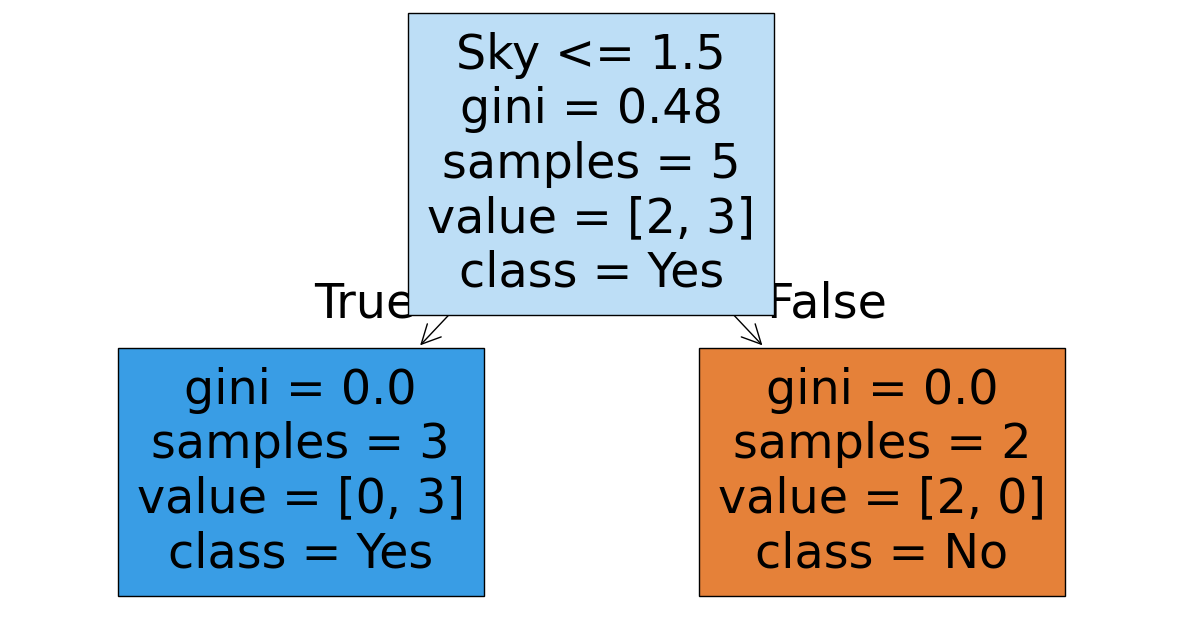

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No','Yes'],
    filled=True
)
plt.show()


#REALISTIC DATA (NUMERIC)

In [ ]:
data = {
    'Age': [25,30,45,35,22,40,50,28],
    'Income': [30,50,80,60,20,70,90,40],
    'Credit_Score': [600,700,750,720,580,730,780,690],
    'Loan_Approved': [0,1,1,1,0,1,1,0]
}

df = pd.DataFrame(data)

X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']


In [ ]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)

model.predict([[32, 55, 710]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

#Decision Tree on iris datasets

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data

In [ ]:
y=iris.target

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(120, 4)

In [ ]:
X_test.shape

(30, 4)

In [ ]:
y_train.shape

(120,)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

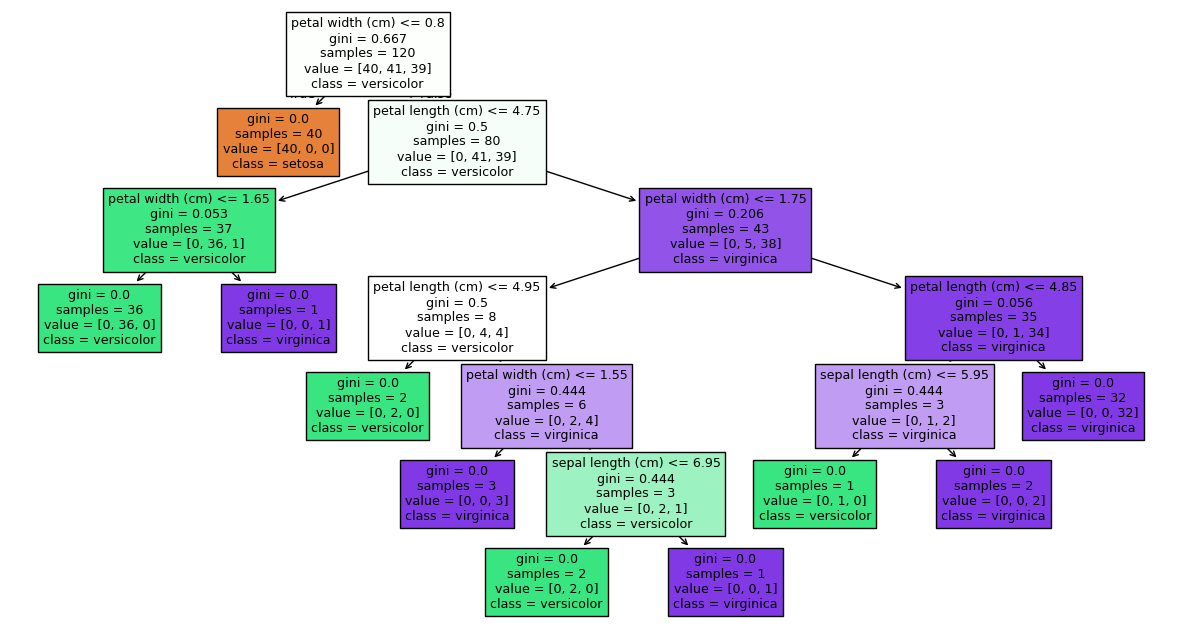

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df=sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Independent and dependent feature

In [ ]:
import numpy as np
X=df.iloc[:,:-1]
y=iris.target

In [ ]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

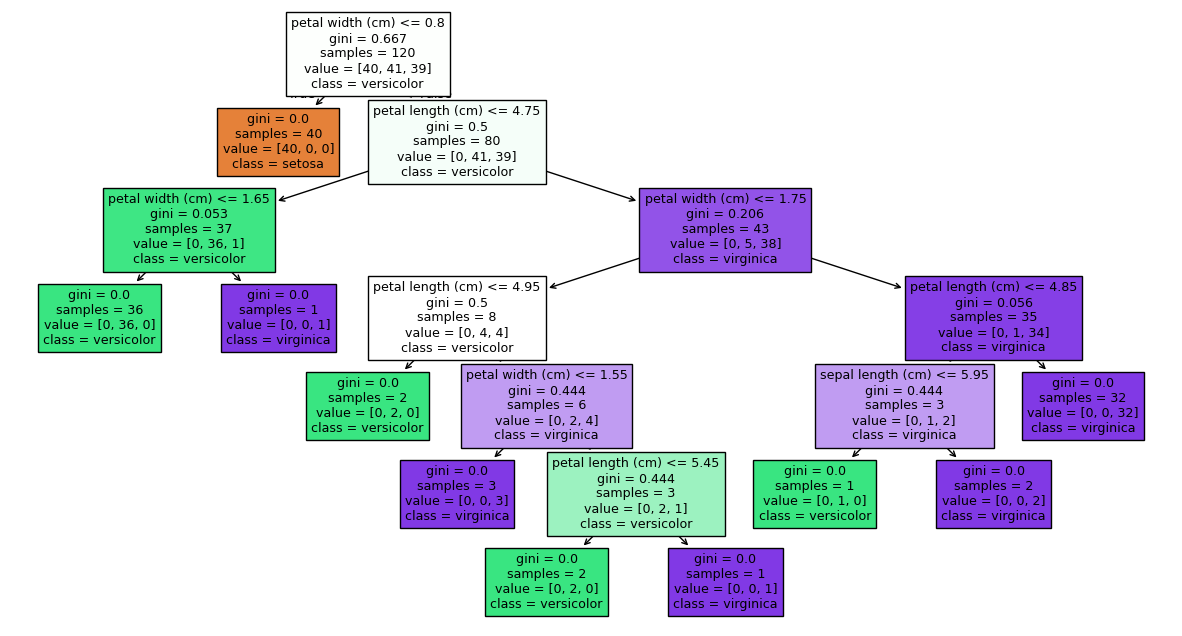

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plot_tree(clf,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()